In [3]:
import numpy as np
import pandas as pd

In [6]:
file_path = '/Users/kanaha/statistics/SSDSE-D-2023.xlsx'
df = pd.read_excel(file_path)
print(df.head())

  SSDSE-D-2023   2021年 Prefecture         MA00           MB00  MB01 MB011  \
0         男女の別   地域コード       都道府県  推定人口（10歳以上）  学習・自己啓発・訓練の総数   外国語    英語   
1         0_総数  R00000         全国       112462           39.6  14.1  12.8   
2         0_総数  R01000        北海道         4614             35  11.1   9.9   
3         0_総数  R02000        青森県         1090           25.4   7.4   6.6   
4         0_総数  R03000        岩手県         1075           28.9   7.7   7.1   

      MB012             MB02        MB021  ... MG20   MG51 MG52 MG53  \
0  英語以外の外国語  商業実務・ビジネス関係(総数)  パソコンなどの情報処理  ...  その他  通勤・通学   仕事   学業   
1       4.2             20.1         16.5  ...   16     79  340  393   
2       3.3               17         14.1  ...   15     64  343  391   
3         2             12.7         10.3  ...   12     61  370  423   
4       2.4             12.8         10.3  ...   17     63  362  472   

       MH01      MH02      MH03      MH04      MH51       MH52  
0        起床      朝食開始      夕食開始        

In [7]:
# Excelファイルを読み込む際に、ヘッダーを2行目（インデックス1）にする
df = pd.read_excel(file_path, header=1)
#２列目を削除する
df = df.drop(df.columns[1], axis=1)

print(df.head())

   男女の別 都道府県  推定人口（10歳以上）  学習・自己啓発・訓練の総数   外国語    英語  英語以外の外国語  \
0  0_総数   全国       112462           39.6  14.1  12.8       4.2   
1  0_総数  北海道         4614           35.0  11.1   9.9       3.3   
2  0_総数  青森県         1090           25.4   7.4   6.6       2.0   
3  0_総数  岩手県         1075           28.9   7.7   7.1       2.4   
4  0_総数  宮城県         2065           37.5  12.4  10.9       4.0   

   商業実務・ビジネス関係(総数)  パソコンなどの情報処理  商業実務・ビジネス関係  ...  その他.4  通勤・通学.1  仕事.1  学業.1  \
0             20.1         16.5          8.5  ...     16       79   340   393   
1             17.0         14.1          6.7  ...     15       64   343   391   
2             12.7         10.3          5.2  ...     12       61   370   423   
3             12.8         10.3          5.4  ...     17       63   362   472   
4             18.9         16.0          7.4  ...     16       73   352   395   

         起床      朝食開始      夕食開始        就寝        出勤  仕事からの帰宅時間  
0  06:38:00  07:11:00  18:58:00  23:04:00  08:20:00

## 仕事の都道府県別の男女比較


都道府県別の男女別仕事時間（平均）:
男女の別   0_総数    1_男    2_女
都道府県                     
三重県   203.0  263.0  145.0
京都府   186.0  248.0  130.0
佐賀県   223.0  278.0  174.0
全国    208.0  267.0  152.0
兵庫県   199.0  260.0  143.0
北海道   199.0  260.0  143.0
千葉県   209.0  276.0  142.0
和歌山県  198.0  257.0  144.0
埼玉県   200.0  263.0  138.0
大分県   201.0  254.0  153.0
大阪府   199.0  256.0  146.0
奈良県   189.0  256.0  129.0
宮城県   213.0  276.0  153.0
宮崎県   213.0  263.0  168.0
富山県   224.0  275.0  176.0
山口県   193.0  248.0  143.0
山形県   219.0  280.0  161.0
山梨県   217.0  276.0  160.0
岐阜県   210.0  261.0  162.0
岡山県   208.0  265.0  155.0
岩手県   218.0  260.0  179.0
島根県   227.0  277.0  179.0
広島県   203.0  267.0  143.0
徳島県   203.0  245.0  163.0
愛媛県   198.0  256.0  145.0
愛知県   214.0  286.0  143.0
新潟県   209.0  261.0  160.0
東京都   222.0  272.0  173.0
栃木県   221.0  281.0  162.0
沖縄県   215.0  268.0  164.0
滋賀県   206.0  277.0  137.0
熊本県   205.0  263.0  152.0
石川県   224.0  282.0  169.0
神奈川県  206.0  268.0  145.0
福井県   223.0  271.0  177.0
福岡県   203.0  264.0

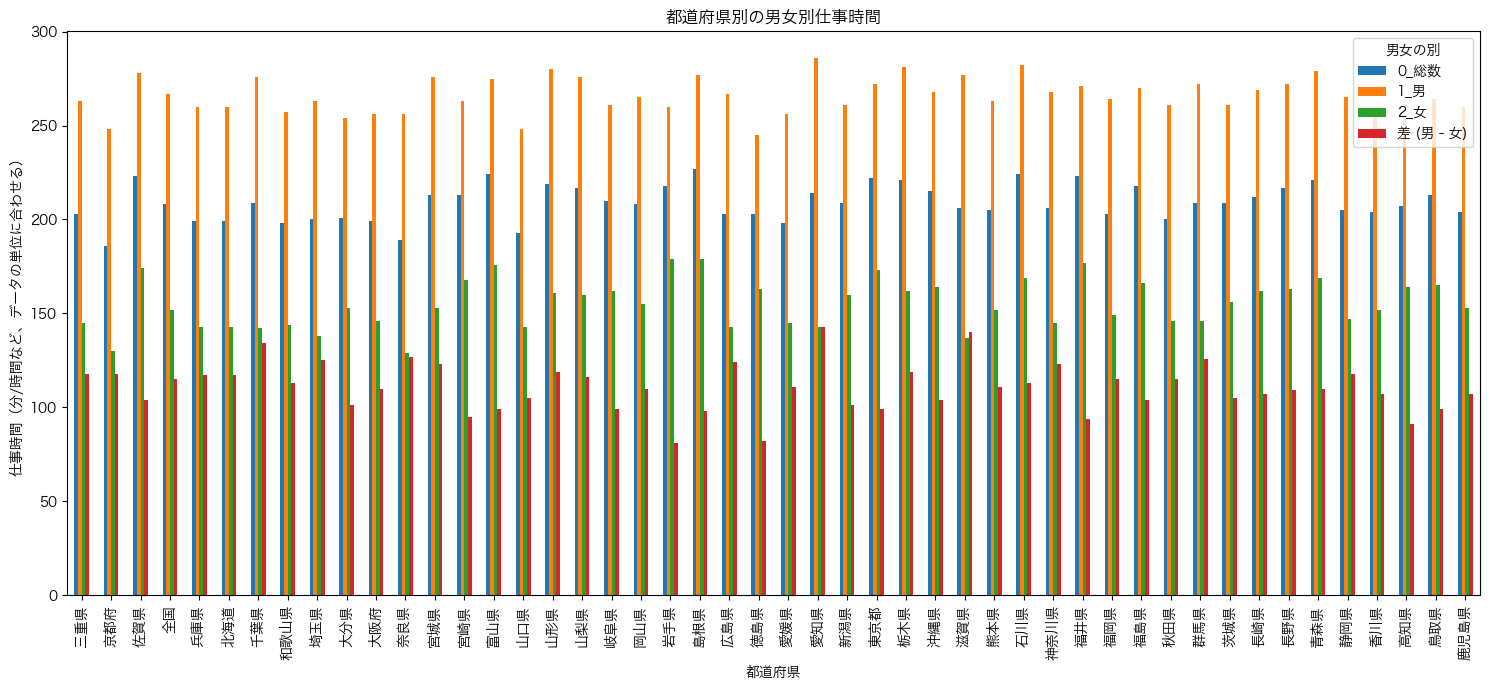

In [9]:
plt.rcParams['font.family'] = 'Hiragino Sans GB' # Macの場合の例
plt.rcParams['axes.unicode_minus'] = False # マイナス記号を正しく表示するため

df_selected = df[['男女の別', '都道府県', '仕事']].copy()

df_selected['仕事'] = pd.to_numeric(df_selected['仕事'], errors='coerce')

# # NaN値がある行を削除するか、適切に処理する
# # 今回は比較のため、NaNがある行は削除するのが良いでしょう
# df_selected.dropna(subset=['仕事'], inplace=True)

# 男女別の仕事の時間を都道府県ごとに集計
# '男女の別' 列の値が '1_男' と '2_女' であると仮定します。
# もし異なる値が入っている場合は、適宜修正してください。

# ピボットテーブルを作成して、都道府県別に男女の仕事の時間を比較
pivot_df = df_selected.pivot_table(index='都道府県', columns='男女の別', values='仕事', aggfunc='mean')

# 結果を表示
print("\n都道府県別の男女別仕事時間（平均）:")
print(pivot_df)

# 必要であれば、さらに詳細な分析や可視化を行うことができます。
# 例: 男性の仕事時間が女性より長い都道府県を特定
if '1_男' in pivot_df.columns and '2_女' in pivot_df.columns:
    pivot_df['差 (男 - 女)'] = pivot_df['1_男'] - pivot_df['2_女']
    print("\n仕事時間の差 (男 - 女):")
    print(pivot_df.sort_values(by='差 (男 - 女)', ascending=False))

#グラフでの可視化の例 (matplotlibやseabornを使用)
import matplotlib.pyplot as plt
import seaborn as sns

pivot_df.plot(kind='bar', figsize=(15, 7))
plt.title('都道府県別の男女別仕事時間')
plt.xlabel('都道府県')
plt.ylabel('仕事時間（分/時間など、データの単位に合わせる）')
plt.xticks(rotation=90)
plt.legend(title='男女の別')
plt.tight_layout()
plt.show()